### Korean Bond Market

In [1]:
import numpy as np
import pandas as pd

In [2]:
y3 = pd.read_csv('../Data/KRY3.csv', index_col = 0).iloc[:,1]
y5 = pd.read_csv('../Data/KRY5.csv', index_col = 0).iloc[:,1]
y10 = pd.read_csv('../Data/KRY10.csv', index_col = 0).iloc[:,1]

In [3]:
bond_matrix = pd.concat([y3, y5, y10], axis = 1)
bond_matrix.columns = ['Y3RR','Y5RR','Y10RR']

In [4]:
bond_matrix.index = pd.DatetimeIndex(bond_matrix.index) - pd.DateOffset(days=1)
bond_matrix = bond_matrix.sort_index(ascending = True)
bond_matrix = bond_matrix.dropna() * 0.01
bond_matrix.index.name = 'Date'

Text(0.5, 1.0, 'Bond Spread')

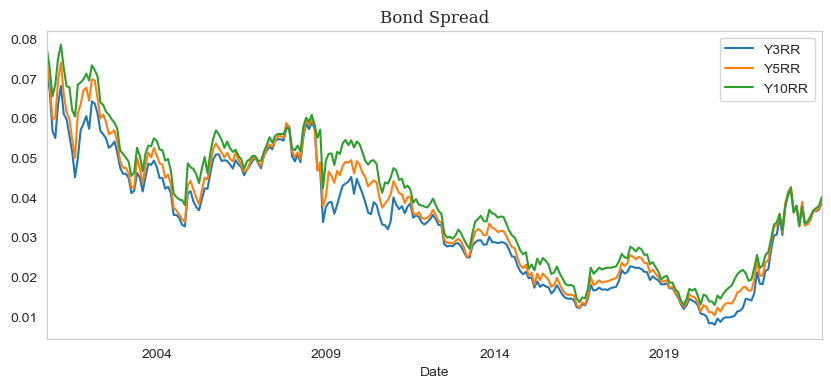

In [5]:
import matplotlib.pyplot as plt
bond_matrix.plot(figsize = (10, 4))
plt.grid(False)
plt.title('Bond Spread', fontsize = 12, fontfamily = 'Serif')

In [6]:
bond_matrix['spread'] = bond_matrix['Y10RR'] - bond_matrix['Y3RR']

Text(0.5, 1.0, 'Bond Spread (3Y - 10Y)')

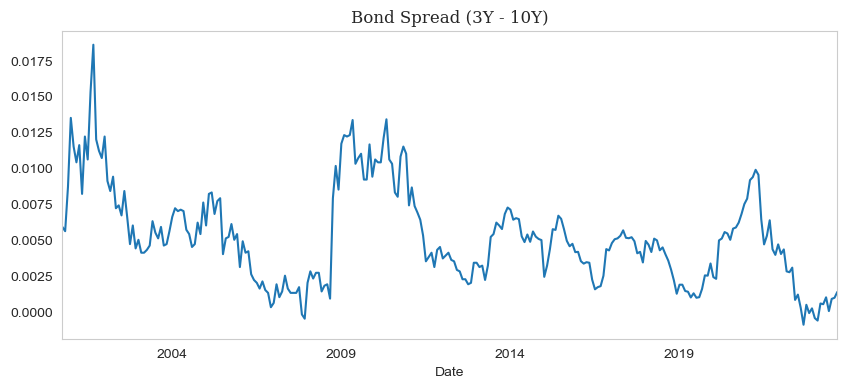

In [7]:
bond_matrix['spread'].plot(figsize = (10, 4))
plt.grid(False)
plt.title('Bond Spread (3Y - 10Y)', fontsize = 12, fontfamily = 'Serif')

In [29]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, 
                      covariance_type = 'diag', 
                      random_state = 42,
                      init_params = 'kmeans',
                      tol = 0.001)
fit = gmm.fit(bond_matrix['spread'].values.reshape(-1,1))

In [30]:
fit

GaussianMixture(covariance_type='diag', n_components=2, random_state=42)

In [31]:
predict = fit.predict(bond_matrix['spread'].values.reshape(-1,1))

In [32]:
bond_matrix['Label'] = predict

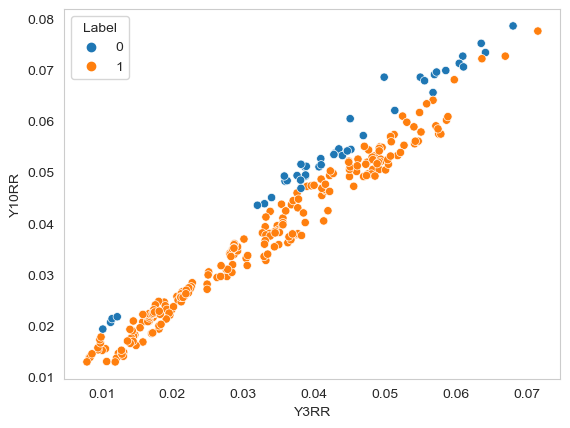

In [33]:
import seaborn as sns
sns.scatterplot(bond_matrix, x = 'Y3RR', y = 'Y10RR', hue = 'Label')
plt.grid(False)

In [34]:
bond_matrix

,Y3RR,Y5RR,Y10RR,spread,Label,pred0,pred1,pred2
Date,,,,,,,,
2000-10-31,0.07160,0.07390,0.07750,0.00590,1,0.077213,0.296699,0.626088
2000-11-30,0.06700,0.06910,0.07260,0.00560,1,0.064234,0.321003,0.614763
2000-12-31,0.05680,0.05970,0.06550,0.00870,0,0.361183,0.081910,0.556907
2001-01-31,0.05500,0.06000,0.06850,0.01350,0,0.946826,0.000344,0.052831
2001-02-28,0.06360,0.06960,0.07510,0.01150,0,0.802582,0.005432,0.191986
...,...,...,...,...,...,...,...,...
2023-05-31,0.03440,0.03440,0.03539,0.00099,1,0.005050,0.534727,0.460223
2023-06-30,0.03673,0.03667,0.03676,0.00003,1,0.003385,0.536472,0.460143
2023-07-31,0.03646,0.03665,0.03734,0.00088,1,0.004810,0.535659,0.459531


Text(0.5, 1.0, 'Bond Spread(10Y-3Y)')

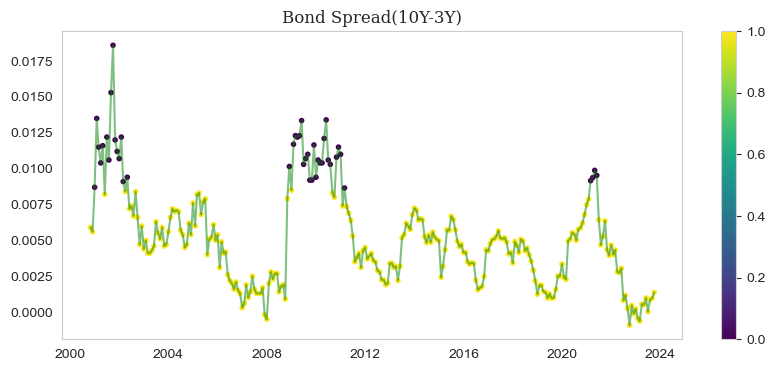

In [35]:
plt.figure(figsize = (10, 4))
plt.plot(bond_matrix['spread'], color = 'g', alpha = 0.5)
plt.scatter(bond_matrix.index, bond_matrix['spread'], 
            c = bond_matrix['Label'].values, cmap = 'viridis',
            marker = '.')
plt.colorbar()
plt.grid(False)
plt.title('Bond Spread(10Y-3Y)', fontsize = 12, fontfamily = 'Serif')

1 : 불황, 0 : 호황

In [37]:
bond_matrix[['pred0','pred1']] = fit.predict_proba(bond_matrix['spread'].values.reshape(-1,1))

Text(0.5, 1.0, 'Bond Spread(10Y-3Y)')

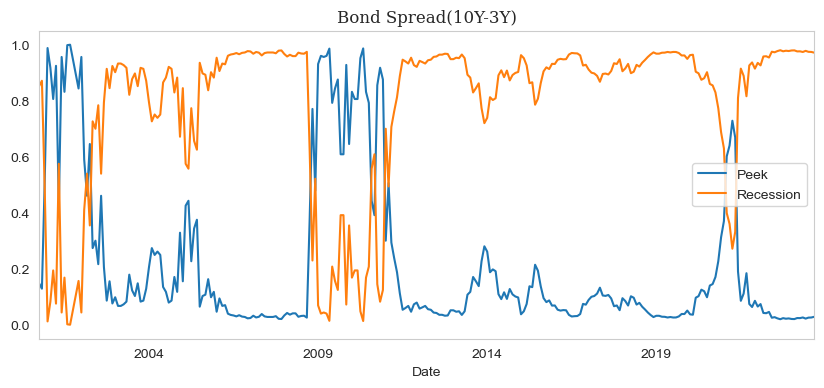

In [41]:
bond_matrix[['pred0', 'pred1']].plot(figsize = (10, 4))
plt.grid(False)
plt.legend(['Peek','Recession'])
plt.title('Bond Spread(10Y-3Y)', fontsize = 12, fontfamily = 'Serif')